In [1]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org imblearn

     |████████████████████████████████| 189 kB 646 kB/s eta 0:00:01
     |████████████████████████████████| 24.8 MB 453 kB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [12]:
"""
Are you predicting probabilities?
    – Do you need class labels?
    * Is the positive class more important?
        · Use Precision-Recall AUC
    * Are both classes important?
        · Use ROC AUC
    – Do you need probabilities?
        * Use Brier Score and Brier Skill Score
 Are you predicting class labels?
    – Is the positive class more important?
        * Are False Negatives and False Positives Equally Important?
            · Use F1-measure
        * Are False Negatives More Important?
            · Use F2-measure
        * Are False Positives More Important?
            · Use F0.5-measure
     – Are both classes important?

    * Do you have < 80%-90% Examples for the Majority Class?
        · Use Accuracy
    * Do you have > 80%-90% Examples for the Majority Class?
        · Use G-mean"""

'Are you predicting probabilities?\n    – Do you need class labels?\n    * Is the positive class more important?\n        · Use Precision-Recall AUC\n    * Are both classes important?\n        · Use ROC AUC\n    – Do you need probabilities?\n        * Use Brier Score and Brier Skill Score\n\x88 Are you predicting class labels?\n    – Is the positive class more important?\n        * Are False Negatives and False Positives Equally Important?\n            · Use F1-measure\n        * Are False Negatives More Important?\n            · Use F2-measure\n        * Are False Positives More Important?\n            · Use F0.5-measure\n     – Are both classes important?\n\n    * Do you have < 80%-90% Examples for the Majority Class?\n        · Use Accuracy\n    * Do you have > 80%-90% Examples for the Majority Class?\n        · Use G-mean'

In [2]:
import numpy as np

#                REALITY
#Prediction   ( TP     FP  
#             ( FN     TN  )

#Métriques utilisables basés sur la matrice de confusion
from imblearn.metrics import sensitivity_score  # sensitivity = TP / (TP + FN)
from imblearn.metrics import specificity_score  # specificity = TN (FP+ TN)
from imblearn.metrics import geometric_mean_score # sqrt(sensitivity*specificity)
from sklearn.metrics import precision_score # precision TP/(TP+FP)
from sklearn.metrics import recall_score # recall TP/(TP + FP)
from sklearn.metrics import f1_score     # F measure (2 × Precision × Recall) / (Precision + Recall)


#Métriques utilisables basés sur probabilités d'appartenance à une classe
from sklearn.metrics import roc_curve # summarizes the performance of a binary classification model on the positive class
from sklearn.metrics import roc_auc_score # Area under the roc curve
from sklearn.metrics import precision_recall_curve #quantifies the number of correct positive predictions made
from sklearn.metrics import auc # Area under the curve, utile pour la PR Curve

In [3]:
#Jeux de donnée random
y = [0,0,1,0,0,0,1,1,0] #
y_pred = [1,0,0,0,1,0,1,1,1]

In [4]:
print("specificity score : ",specificity_score(y_pred,y))
print("sensitivity score : ",sensitivity_score(y_pred,y))
print("geometric_mean score : ",geometric_mean_score(y,y_pred))
print("precision score :",precision_score(y, y_pred))
print("recall score :",recall_score(y, y_pred))
print("F measure score :",f1_score(y, y_pred))


specificity score :  0.75
sensitivity score :  0.4
geometric_mean score :  0.5773502691896257
precision score : 0.4
recall score : 0.6666666666666666
F measure score : 0.5


# ROC CURVE

Aire sous la courbe roc : 0.9028205128205128


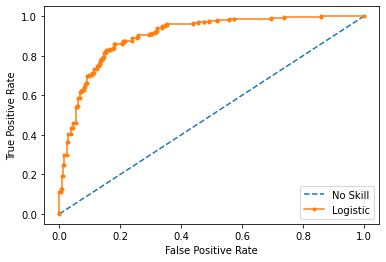

In [5]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from matplotlib import pyplot


# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)      #REMPLACER PAR NOS Y_TEST ET NOS PREDICTIONS A NOUS
print("Aire sous la courbe roc :",roc_auc_score(testy,pos_probs))
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend() 
# show the plot
pyplot.show()

# PR CURVE

Aire sous la Pr Curve :  0.8977244980325833


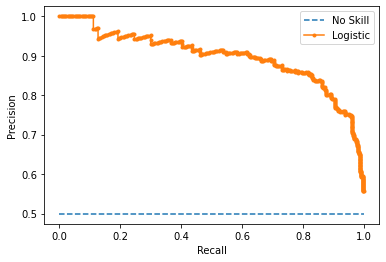

In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(testy, pos_probs)
print("Aire sous la Pr Curve : ",auc(recall, precision))
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


# STRATIFIED K FOLD AND SPLITS

In [10]:
#Respect de la proportion d'anomalies dans chaque sous échantillons

from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], flip_y=0,
random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
    # select rows
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))


>Train: 0=792, 1=8, Test: 0=198, 1=2
>Train: 0=792, 1=8, Test: 0=198, 1=2
>Train: 0=792, 1=8, Test: 0=198, 1=2
>Train: 0=792, 1=8, Test: 0=198, 1=2
>Train: 0=792, 1=8, Test: 0=198, 1=2


In [8]:
#Rajouter le stratify = y permet d'affecter la meme proportion d'anomalies dans le train et le test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2,
stratify=y)

# STRATIFIED K-FOLD CROSS VALIDATION

In [11]:
#Permet de faire de la cross validation sur des folds stratifiés 
from statistics import mean, stdev
from sklearn import preprocessing
# from sklearn.model_selection imp:ort StratifiedKFolds
from sklearn import linear_model
from sklearn import datasets
  
# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
cancer = datasets.load_breast_cancer()
# Input_x_Features.
x = cancer.data                        
 
# Input_ y_Target_Variable.
y = cancer.target                      
   
  
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
  
# Create  classifier object.
lr = linear_model.LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

In [12]:
lst_accu_stratified

[0.9298245614035088,
 0.9649122807017544,
 0.9824561403508771,
 1.0,
 0.9649122807017544,
 0.9649122807017544,
 0.9824561403508771,
 0.9473684210526315,
 0.9473684210526315,
 0.9821428571428571]

In [13]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [14]:
print(clf.cv_results_['mean_test_score'])


[0.98       0.96666667 0.98       0.98      ]


In [15]:
clf.cv_results_['split0_test_score']

array([0.96666667, 0.96666667, 0.96666667, 0.96666667])